Veri Setinin içeriye aktarılması ve kullanılacak kütüphaneleri etkinleştirme

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
data = pd.read_csv('NetflixOriginals.csv', encoding='ISO-8859-1')

1-Veri setinin sınıflandırılması

In [3]:
data['Title'] = data['Title'].convert_dtypes()
data['Genre'] = data['Genre'].convert_dtypes()
data['Language'] = data['Language'].convert_dtypes()
data['Runtime'] = pd.to_numeric(data['Runtime'])
data['Premiere'] = pd.to_datetime(data['Premiere'])
data['Premiere Year'] = data['Premiere'].dt.year

2- Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0
Premiere Year,584.0,2018.936644,1.473992,2014.0,2018.0,2019.00,2020.0,2021.0


In [5]:
long_run = data[data['Runtime'] > 97]['Runtime']
long_run_lang = data[data['Runtime'] > 97]['Language']

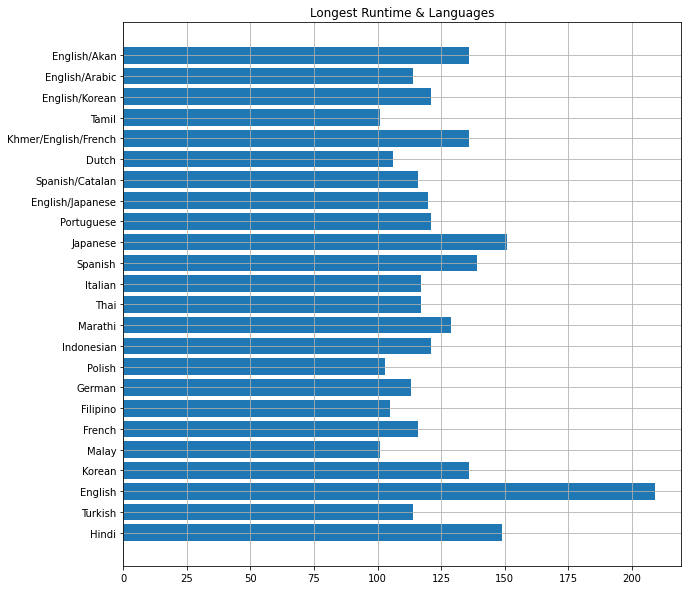

In [6]:
fig = plt.figure(figsize = (10, 10))

plt.barh(long_run_lang, long_run)
plt.title('Longest Runtime & Languages')
plt.grid()
plt.show()

3- 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [7]:
doc = data[ (data['Premiere'] > '2019-01-01') & (data['Premiere'] <'2020-06-30') & (data['Genre'] == 'Documentary') ]
film_listesi = doc['Title'].tolist()
puan = doc['IMDB Score'].tolist()

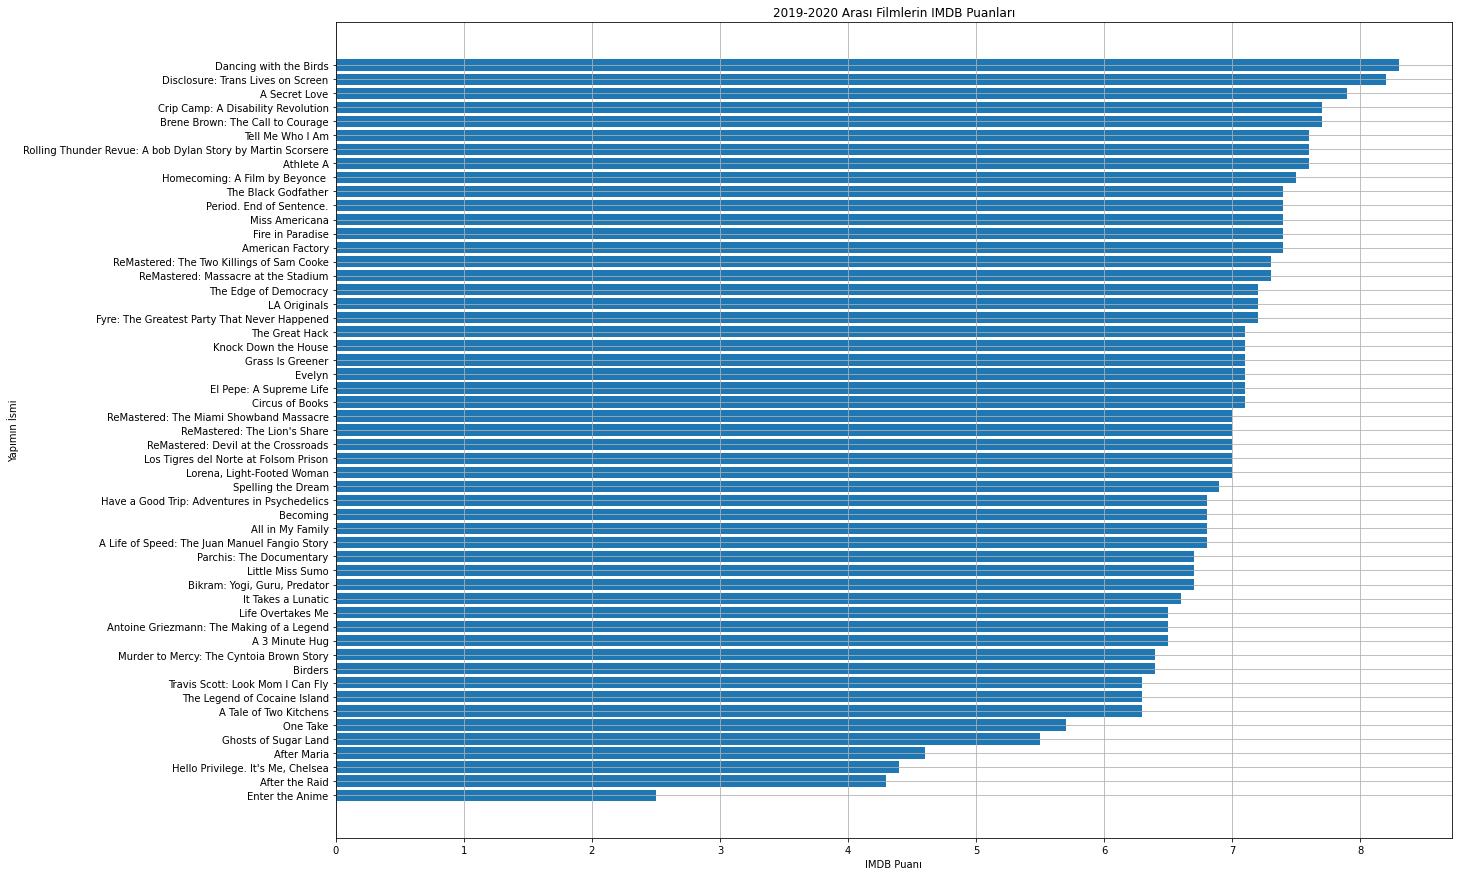

In [8]:
fig = plt.figure(figsize = (20, 15))

plt.barh(film_listesi, puan)
plt.xlabel("IMDB Puanı")
plt.ylabel('Yapımın İsmi')
plt.title("2019-2020 Arası Filmlerin IMDB Puanları")
plt.grid()
plt.show()

4-İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?


In [9]:
ingilizceler = data[data['Language'] == 'English']
best_ing = ingilizceler.sort_values(by=['IMDB Score'], ascending=False).head()
score = data['IMDB Score']
best_ing.reset_index(drop=True)
best_ing.index = range(1, len(best_ing) + 1)
best_ing.head(1)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere Year
1,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020


5- 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [10]:
hindi_mean = data[data['Language']=='Hindi' ]['Runtime']
data[data['Language'] == 'Hindi']['Runtime'].mean()

115.78787878787878

6-'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

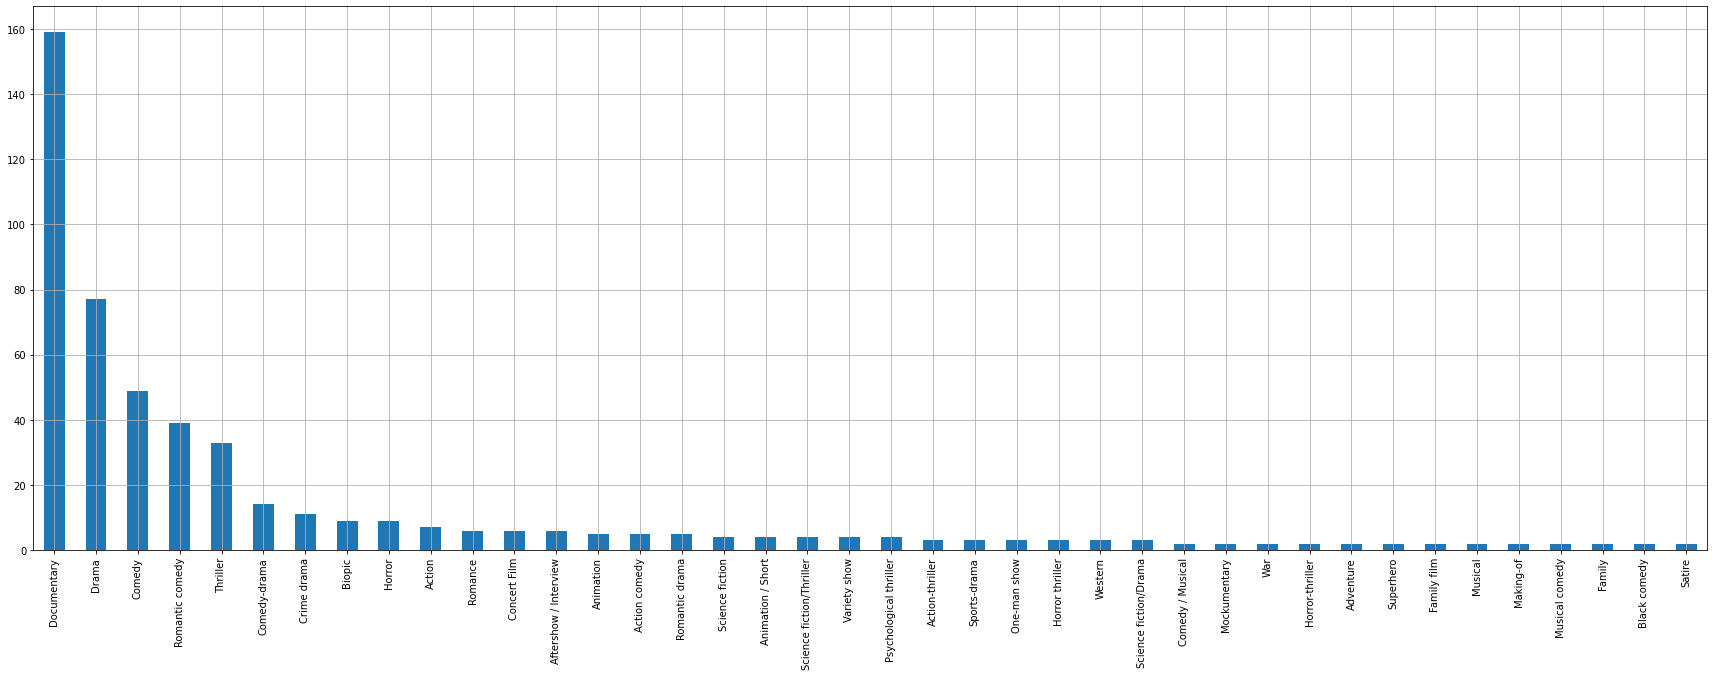

In [11]:
#what are the genre types? visualize the distribution of genres
fig = plt.figure(figsize = (30, 10))
genre_types = data['Genre'].value_counts()
genre_types.head(40).plot(kind='bar')
plt.grid()
plt.show()

7- Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz

<AxesSubplot:>

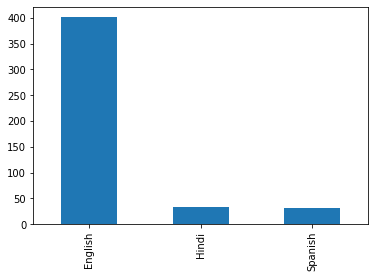

In [12]:
lang_frequency = data['Language'].value_counts()
lang_frequency.head(3)
lang_frequency.head(3).plot(kind='bar')

8-IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [13]:
ilk_on_film = data.sort_values(by=['IMDB Score'], ascending=False)[['Title', 'IMDB Score']].head(10)
ilk_on_film.reset_index(drop=True)
ilk_on_film.index = range(1, len(ilk_on_film) + 1)
ilk_on_film.head(10)

,Title,IMDB Score
1,David Attenborough: A Life on Our Planet,9.0
2,Emicida: AmarElo - It's All For Yesterday,8.6
3,Springsteen on Broadway,8.5
4,Winter on Fire: Ukraine's Fight for Freedom,8.4
5,Taylor Swift: Reputation Stadium Tour,8.4
6,Ben Platt: Live from Radio City Music Hall,8.4
7,Dancing with the Birds,8.3
8,Cuba and the Cameraman,8.3
9,Klaus,8.2
10,13th,8.2


9-  IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

Text(0, 0.5, 'Film Süresi')

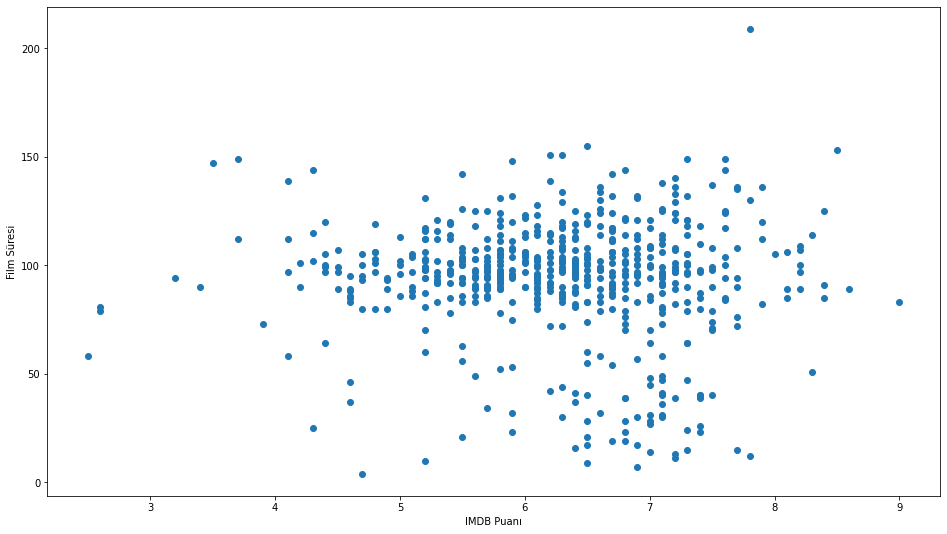

In [14]:
fig = plt.figure(figsize = (16, 9))

puan = data["IMDB Score"]
time = data['Runtime']

plt.scatter(puan, time)
plt.xlabel('IMDB Puanı')
plt.ylabel('Film Süresi')

10- IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [15]:
genre_points = data.groupby('Genre').agg({'IMDB Score': 'max'}).sort_values(by='IMDB Score', ascending=False).head(10)
genre_list = []
genre_list.extend(data['Genre'].tolist())
genre_points.head(10)

,IMDB Score
Genre,
Documentary,9.0
One-man show,8.5
Concert Film,8.4
Animation/Christmas/Comedy/Adventure,8.2
Drama,7.9
Animation / Short,7.8
Crime drama,7.8
Musical / Short,7.7
Making-of,7.7


11- Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

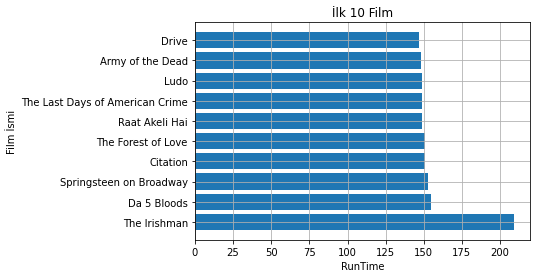

In [16]:
ilk_on_runtime = data.sort_values(by=['Runtime'], ascending=False)[['Title','Runtime']].head(10)
ilk_on_runtime.head(10)
plt.barh(ilk_on_runtime['Title'], ilk_on_runtime['Runtime'])
plt.xlabel('RunTime')
plt.ylabel('Film İsmi')
plt.title('İlk 10 Film')
plt.grid()
plt.show()

12- Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz

In [17]:
doc = data[ (data['Premiere'] > '2015-01-01') & (data['Premiere'] <'2016-01-01')].value_counts()
doc.head()

Title                                             Genre             Premiere    Runtime  IMDB Score  Language      Premiere Year
A Very Murray Christmas                           Comedy / Musical  2015-12-04  56       5.5         English       2015             1
Beasts of No Nation                               War drama         2015-10-16  136      7.7         English/Akan  2015             1
Hot Girls Wanted                                  Documentary       2015-05-29  84       6.1         English       2015             1
Keith Richards: Under the Influence               Documentary       2015-09-18  81       7.1         English       2015             1
The Other One: The Long Strange Trip of Bob Weir  Documentary       2015-05-22  83       7.3         English       2015             1
dtype: int64

13- Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [18]:
en_dusuk_imbd = data.sort_values(by=['IMDB Score'], ascending=True)[['Title', 'Language' ,'IMDB Score']].head()
en_dusuk_imbd.head()


,Title,Language,IMDB Score
0,Enter the Anime,English/Japanese,2.5
1,Dark Forces,Spanish,2.6
2,The App,Italian,2.6
3,The Open House,English,3.2
4,Kaali Khuhi,Hindi,3.4


14- Hangi yılın toplam "runtime" süresi en fazladır

In [19]:
data.groupby('Premiere Year').agg({'Runtime':'sum'}).sort_values(by='Runtime', ascending=False)


,Runtime
Premiere Year,
2020,17384
2019,10856
2018,9405
2021,7214
2017,6129
2016,2766
2015,814
2014,81


15- Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [43]:
i=0
while i < data['Language'].value_counts().count():
  print(data['Language'][i])
  en_movies = data[data['Language'] == data['Language'][i]]
  print(en_movies['Genre'].value_counts().head(1))
  i+=1

English/Japanese
Documentary    1
Name: Genre, dtype: Int64
Spanish
Documentary    8
Name: Genre, dtype: Int64
Italian
Drama    4
Name: Genre, dtype: Int64
English
Documentary    120
Name: Genre, dtype: Int64
Hindi
Drama    13
Name: Genre, dtype: Int64
Hindi
Drama    13
Name: Genre, dtype: Int64
Turkish
Comedy    2
Name: Genre, dtype: Int64
English
Documentary    120
Name: Genre, dtype: Int64
English
Documentary    120
Name: Genre, dtype: Int64
Hindi
Drama    13
Name: Genre, dtype: Int64
English
Documentary    120
Name: Genre, dtype: Int64
Korean
Drama    2
Name: Genre, dtype: Int64
Indonesian
Drama    3
Name: Genre, dtype: Int64
Malay
Action comedy    1
Name: Genre, dtype: Int64
English
Documentary    120
Name: Genre, dtype: Int64
Spanish
Documentary    8
Name: Genre, dtype: Int64
Hindi
Drama    13
Name: Genre, dtype: Int64
English
Documentary    120
Name: Genre, dtype: Int64
Korean
Drama    2
Name: Genre, dtype: Int64
English
Documentary    120
Name: Genre, dtype: Int64
English
Docum

16- Veri setinde outlier veri var mıdır? Açıklayınız.

In [21]:
data.describe()

,Runtime,IMDB Score,Premiere Year
count,584.000000,584.000000,584.000000
mean,93.577055,6.271747,2018.936644
std,27.761683,0.979256,1.473992
min,4.000000,2.500000,2014.000000
25%,86.000000,5.700000,2018.000000
50%,97.000000,6.350000,2019.000000
75%,108.000000,7.000000,2020.000000
max,209.000000,9.000000,2021.000000


In [22]:
fig = px.histogram(data, x= 'Runtime')
fig.show()

In [23]:
fig2 = px.histogram(data, x= 'IMDB Score')
fig2.show()

In [24]:
fig3 = px.histogram(data, x= 'Premiere Year')
fig3.show()

Runtime'da outlier veri bulunmaktadır.